## Observations and Insights 

Observations and inferences:
1. The percentage between tested male mice and female mice is pretty much equal so it is safe to say the the test is representative of all the mice.
2. The average tumor size correlates fairly well with the weight of the tested mice. The heavier the mice, the larger the tumor tends to be. Given this knowledge, maintaining a healthy diet and exercise may help decrease the size of the tumor and make the drug more effective.
3. Though the analysis is only for one mouse (l509), at the 20 day mark, there is a drastic decrease in the tumor size showing the effectiveness of the drug.
4. Capumulin and Ramicane are both effective drugs in reducing the tumor size in comparison to its other competitors.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count=len(combined_data["Mouse ID"].unique())
unique_mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Credit: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate_id=combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data=combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice_count=len(cleaned_data["Mouse ID"].unique())
cleaned_unique_mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Grouping cleaned_data by Drug Regimen and Tumor Volume
stats_df=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

#Calculating the mean
mean_tumor_vol=stats_df.mean()

#Calculating the median
median_tumor_vol=stats_df.median()

#Calculating the variance
variance_tumor_vol=stats_df.var()

#Calculating the standard deviation
std_tumor_vol=stats_df.std()

#Calculating the SEM
sem_tumor_vol=stats_df.sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Creating a dataframe of the results
summary_stats_df=pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol, "Median Tumor Volume": median_tumor_vol, "Tumor Volume Variance": variance_tumor_vol, "Tumor Volume Std. Dev.": std_tumor_vol, "Tumor Volume Std. Err.": sem_tumor_vol})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Grouping cleaned_data by Drug Regimen
stats2_df=cleaned_data.groupby("Drug Regimen")

#Calculating mean, median, variance, standard deviation, and SEM through groupby and .agg
#credit: https://stackoverflow.com/questions/57842316/pandas-calculate-variance-from-aggregation
summary_stats_2=stats2_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary_stats_2



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

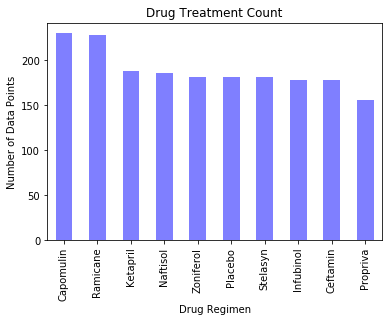

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#credit: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
drug_regimen=cleaned_data["Drug Regimen"].value_counts()

#Plotting the results
drug_regimen.plot(kind="bar",color="blue", alpha=0.5, align="center",)

#Creating bar chart labels
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")




Text(0, 0.5, 'Number of Data Points')

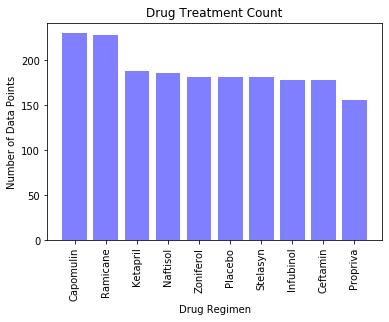

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen=cleaned_data["Drug Regimen"].value_counts()

#Determining the x and y values
x=drug_regimen.index
y=drug_regimen.values

#Plotting the results
plt.bar(x, y, color="blue",alpha=0.5,align="center")
plt.xticks(rotation="vertical")

#Creating bar chart labels
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")



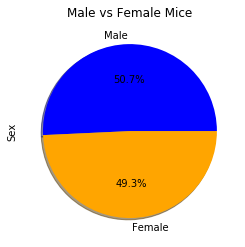

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female=cleaned_data["Sex"].value_counts()

#Creating the pie chart
male_female.plot(kind="pie", title="Male vs Female Mice", autopct="%1.1f%%", shadow=True, startangle=0, colors=["blue","orange"])


Text(0, 0.5, 'Sex')

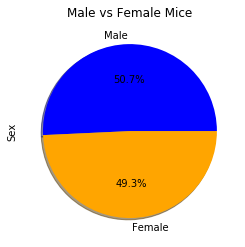

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Determining the criteria for the pi chart
labels=male_female.index
sizes=male_female.values
colors=["blue","orange"]

#Creating the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)

#Creating pie chart labels
plt.title(label="Male vs Female Mice", loc="center")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Filtering the dataframe to include only the indicated drugs
tumor_treatment=cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") | (cleaned_data["Drug Regimen"] == "Ramicane") | (cleaned_data["Drug Regimen"] == "Infubinol") | (cleaned_data["Drug Regimen"] == "Ceftamin"), :]
tumor_treatment

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=tumor_treatment.groupby("Mouse ID").max()["Timepoint"]
last_timepoint_df=pd.DataFrame(last_timepoint)
last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge_df=pd.merge(last_timepoint_df, cleaned_data, how="left", on=("Mouse ID","Timepoint"))
timepoint_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
#Filtering dataframe based on drugs
    filter_df=timepoint_merge_df.loc[timepoint_merge_df["Drug Regimen"]==drug]
    tumor_vol=filter_df["Tumor Volume (mm3)"]
    
#Adding tumor volume to list
    tumor_vol_data.append(tumor_vol)
    
#Calculating the quartiles, lowerq, upperq, iqr and upper/lower bounds
    quartiles = filter_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

#Printing the results
    print(f"{drug} data:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"--------------------------")
    

Capomulin data:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------
Ramicane data:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------------
Infubinol data:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
--------------------------
Ceftamin data:
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interqua

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddc1dcc08>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddc1dcd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ddc1dc408>,
 'medians': [<matplotlib.lines.Line2D at 0x29ddc1e1d88>,
 'fliers': [<matplotlib.lines.Line2D at 0x29ddc1e1e08>,
 'means': []}

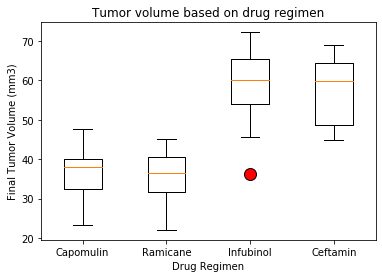

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Credit: https://matplotlib.org/3.1.0/gallery/statistics/boxplot.html
#Customizing the box plot
flierprops = dict(marker="o", markerfacecolor="red", markersize=12, linestyle="none")

fig1, ax1 = plt.subplots()

#Creating labels for the box plot
ax1.set_title("Tumor volume based on drug regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

#Plotting the box plot
ax1.boxplot(tumor_vol_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops=flierprops)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

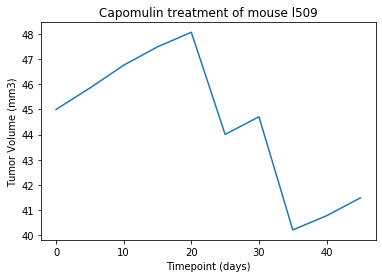

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Filtering the dataframe for mouse id l509 and Capomulin
capomulin_l509_df=cleaned_data.loc[(cleaned_data["Mouse ID"]=="l509")& (cleaned_data["Drug Regimen"]=="Capomulin")]

#Determining the values for each axis
x_axis= capomulin_l509_df["Timepoint"]
y_axis= capomulin_l509_df["Tumor Volume (mm3)"]

#Plotting the line
plt.plot(x_axis,y_axis)

#Creating the labels for the graph
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

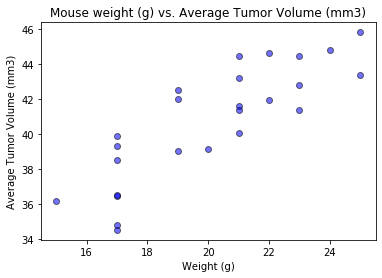

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Filtering the dataframe for Capomulin
capomulin_df=cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin"]

#Grouping the filtered dataframe based on mouse id and calculating the mean
grouped_cap_df=capomulin_df.groupby(["Mouse ID"]).mean()

#Determining the values for each axis
x_axis=grouped_cap_df["Weight (g)"]
y_axis=grouped_cap_df["Tumor Volume (mm3)"]

#Plotting the scatter plot
plt.scatter(x_axis,y_axis,marker="o",facecolors="blue", edgecolors="black", alpha=0.55)

#Labeling the graph
plt.title("Mouse weight (g) vs. Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

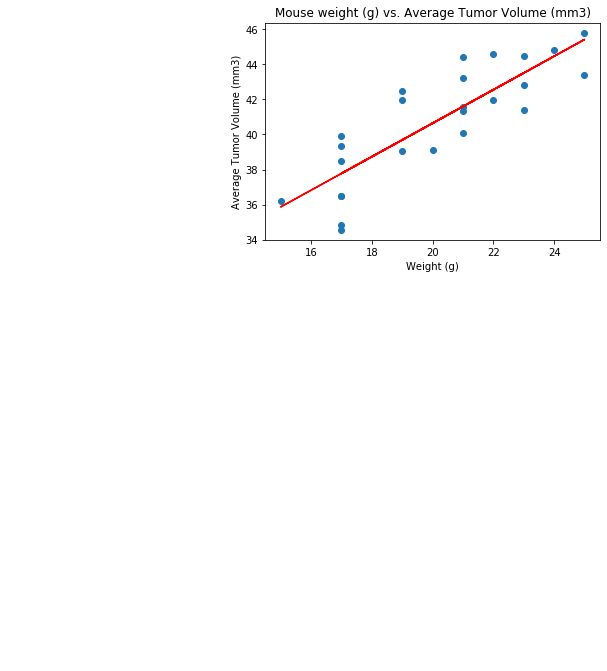

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Reusing the x and y values from the previous graph
x_values = x_axis
y_values = y_axis

#Setting up the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatter plot
plt.scatter(x_values,y_values)

#Adding the regression line
plt.plot(x_values,regress_values,"r-")

#Formatting the line
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Labeling the graph
plt.title("Mouse weight (g) vs. Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()